In [1]:
import numpy as np
from numpy import *
import scipy.special as sp
from math import pow
import linecache
import math
from scipy.special import erf
from numpy.linalg import eig
import sys
from scipy import special
import matplotlib.pyplot as plt
import time


In [2]:
stepindex_ps=[]; time_ps=[]; ekinc_au=[]; Tion_K=[]; etot_au=[]; enthal_au=[]; econs_au=[]; econt_au=[]; Volume_au=[]

conversion = 27.211

In [3]:



#with open("iodate_bulkwater.txt", 'r',buffering=100000) as f:
with open("step_iodate_bulkwater.txt", 'r',buffering=100000) as f:
    for line in f:
        stepindex_ps.append(float(line.split()[0]))
        time_ps.append(float(line.split()[1]))
        ekinc_au.append(float(line.split()[2]))
        Tion_K.append(float(line.split()[4]))
        etot_au.append(float(line.split()[5]))
        enthal_au.append(float(line.split()[6]))               
        econs_au.append(float(line.split()[7]))
        econt_au.append(float(line.split()[8]))
        Volume_au.append(float(line.split()[9]))

        
#print(econs_au)      

In [4]:
#Convert data from atomic unit au to electron volts eV

enthal_eV = np.array(enthal_au) * conversion
#print(enthal_eV)


ekinc_eV = np.array(ekinc_au) * conversion

econs_eV = np.array(econs_au) * conversion

econt_eV = np.array(econt_au) * conversion

In [5]:
#NVT

#Calculates min, max and mean values of the parameters of interest

min_stepindex_ps = np.min(stepindex_ps[0:52000])
max_stepindex_ps = np.max( stepindex_ps[0:52000])
Ave_stepindex_ps = np.mean( stepindex_ps[0:52000])
dif_stepindex_ps = max_stepindex_ps - min_stepindex_ps

print("min_stepindex_ps =", min_stepindex_ps)
print("max_stepindex_ps =", max_stepindex_ps)
print("Ave_stepindex_ps =", Ave_stepindex_ps)
print("dif_stepindex_ps =", dif_stepindex_ps)

min_time_ps = np.min(time_ps[0:52000])
max_time_ps = np.max(time_ps[0:52000])
Ave_time_ps = np.mean(time_ps[0:52000])
dif_time_ps = max_time_ps - min_time_ps 

print("min_time_ps =", min_time_ps)
print("max_time_ps =", max_time_ps)
print("Ave_time_ps =", Ave_time_ps)
print("dif_time_ps =", dif_time_ps)





min_Tion_K = np.min(Tion_K[0:52000])
max_Tion_K = np.max(Tion_K[0:52000])
Ave_Tion_K = np.mean(Tion_K[0:52000])
dif_Tion_K = max_Tion_K - min_Tion_K


print("min_Tion_K =", min_Tion_K)
print("max_Tion_K =", max_Tion_K)
print("Ave_Tion_K =", Ave_Tion_K)
print("dif_Tion_K =", dif_Tion_K) 



min_ekinc_eV = np.min(ekinc_eV[0:52000])
max_ekinc_eV = np.max(ekinc_eV[0:52000])
Ave_ekinc_eV = np.mean(ekinc_eV[0:52000])
dif_ekinc_eV = max_ekinc_eV - min_ekinc_eV

print("min_ekinc_eV =", min_ekinc_eV)
print("max_ekinc_eV =", max_ekinc_eV)
print("Ave_ekinc_eV =", Ave_ekinc_eV)
print("dif_ekinc_eV =", dif_ekinc_eV)


min_econs_eV = np.min(econs_eV[0:52000])
max_econs_eV = np.max(econs_eV[0:52000])
Ave_econs_eV = np.mean(econs_eV[0:52000])
dif_econs_eV =  max_econs_eV  - min_econs_eV  

print("min_econs_eV =", min_econs_eV)
print("max_econs_eV =", max_econs_eV)
print("Ave_econs_eV =", Ave_econs_eV)
print("dif_econs_eV =", dif_econs_eV)


min_econt_eV = np.min(econt_eV[0:52000])
max_econt_eV = np.max(econt_eV[0:52000])
Ave_econt_eV = np.mean(econt_eV[0:52000])
dif_econt_eV = max_econt_eV  - min_econt_eV  

print("min_econt_eV =", min_econt_eV)
print("max_econt_eV =", max_econt_eV)
print("Ave_econt_eV =", Ave_econt_eV)
print("dif_econt_eV =", dif_econt_eV)

min_stepindex_ps = 1.0
max_stepindex_ps = 52000.0
Ave_stepindex_ps = 26000.5
dif_stepindex_ps = 51999.0
min_time_ps = 9.675537e-05
max_time_ps = 5.031279
Ave_time_ps = 2.51568807691149
dif_time_ps = 5.031182244629999
min_Tion_K = 3.739286
max_Tion_K = 1409.129
Ave_Tion_K = 300.0078308291538
dif_Tion_K = 1405.389714
min_ekinc_eV = 0.5492077763
max_ekinc_eV = 113.363910366
Ave_ekinc_eV = 96.38480608392041
dif_ekinc_eV = 112.8147025897
min_econs_eV = -34388.287792595176
max_econs_eV = -34183.99795974123
Ave_econs_eV = -34357.13232003937
dif_econs_eV = 204.28983285394497
min_econt_eV = -34183.9290144142
max_econt_eV = -34098.32972708136
Ave_econt_eV = -34138.46501264323
dif_econt_eV = 85.59928733284323


In [6]:
#NVT

#Calculates the drift in temperature (K/ps) of the computed energies
#Calculates the drift in energy (eV/ps) of the computed energies

drift_Tion_K = dif_Tion_K/dif_stepindex_ps
print(drift_Tion_K)


drift_ekinc_eV = dif_ekinc_eV/dif_stepindex_ps
print(drift_ekinc_eV)


drift_econs_eV = dif_econs_eV/dif_stepindex_ps
print(drift_econs_eV)


drift_econt_eV = dif_econt_eV/dif_stepindex_ps
print(drift_econt_eV)

0.027027245023942766
0.0021695552335564148
0.003928726184233254
0.0016461717981661808


In [7]:

#NVE

#Calculates min, max and mean values of the parameters of interest

nve_min_stepindex_ps = np.min(stepindex_ps[52000:])
nve_max_stepindex_ps = np.max( stepindex_ps[52000:])
nve_Ave_stepindex_ps = np.mean( stepindex_ps[52000:])
nve_dif_stepindex_ps = nve_max_stepindex_ps - nve_min_stepindex_ps

print("nve_min_stepindex_ps =", nve_min_stepindex_ps)
print("nve_max_stepindex_ps =", nve_max_stepindex_ps)
print("nve_Ave_stepindex_ps =", nve_Ave_stepindex_ps)
print("nve_dif_stepindex_ps =", nve_dif_stepindex_ps)

nve_min_time_ps = np.min(time_ps[52000:])
nve_max_time_ps = np.max(time_ps[52000:])
nve_Ave_time_ps = np.mean(time_ps[52000:])
nve_dif_time_ps = nve_max_time_ps - nve_min_time_ps 

print("nve_min_time_ps =", nve_min_time_ps)
print("nve_max_time_ps =", nve_max_time_ps)
print("nve_Ave_time_ps =", nve_Ave_time_ps)
print("nve_dif_time_ps =", nve_dif_time_ps)





nve_min_Tion_K = np.min(Tion_K[52000:])
nve_max_Tion_K = np.max(Tion_K[52000:])
nve_Ave_Tion_K = np.mean(Tion_K[52000:])
nve_dif_Tion_K = nve_max_Tion_K - nve_min_Tion_K


print("nve_min_Tion_K =", nve_min_Tion_K)
print("nve_max_Tion_K =", nve_max_Tion_K)
print("nve_Ave_Tion_K =", nve_Ave_Tion_K)
print("nve_dif_Tion_K =", nve_dif_Tion_K) 



nve_min_ekinc_eV = np.min(ekinc_eV[52000:])
nve_max_ekinc_eV = np.max(ekinc_eV[52000:])
nve_Ave_ekinc_eV = np.mean(ekinc_eV[52000:])
nve_dif_ekinc_eV = nve_max_ekinc_eV - nve_min_ekinc_eV

print("nve_min_ekinc_eV =", nve_min_ekinc_eV)
print("nve_max_ekinc_eV =", nve_max_ekinc_eV)
print("nve_Ave_ekinc_eV =", nve_Ave_ekinc_eV)
print("nve_dif_ekinc_eV =", nve_dif_ekinc_eV)


nve_min_econs_eV = np.min(econs_eV[52000:])
nve_max_econs_eV = np.max(econs_eV[52000:])
nve_Ave_econs_eV = np.mean(econs_eV[52000:])
nve_dif_econs_eV =  nve_max_econs_eV  - nve_min_econs_eV  

print("nve_min_econs_eV =", nve_min_econs_eV)
print("nve_max_econs_eV =", nve_max_econs_eV)
print("nve_Ave_econs_eV =", nve_Ave_econs_eV)
print("nve_dif_econs_eV =", nve_dif_econs_eV)



nve_min_econt_eV = np.min(econt_eV[52000:])
nve_max_econt_eV = np.max(econt_eV[52000:])
nve_Ave_econt_eV = np.mean(econt_eV[52000:])
nve_dif_econt_eV =  nve_max_econt_eV  - nve_min_econt_eV  

print("nve_min_econt_eV =", nve_min_econt_eV)
print("nve_max_econt_eV =", nve_max_econt_eV)
print("nve_Ave_econt_eV =", nve_Ave_econt_eV)
print("nve_dif_econt_eV =", nve_dif_econt_eV)


nve_min_stepindex_ps = 52001.0
nve_max_stepindex_ps = 156000.0
nve_Ave_stepindex_ps = 104000.5
nve_dif_stepindex_ps = 103999.0
nve_min_time_ps = 5.031376
nve_max_time_ps = 15.09384
nve_Ave_time_ps = 10.06260717439423
nve_dif_time_ps = 10.062464
nve_min_Tion_K = 308.9909
nve_max_Tion_K = 1194.518
nve_Ave_Tion_K = 836.3635725778847
nve_dif_Tion_K = 885.5271
nve_min_ekinc_eV = 113.20464438299999
nve_max_ekinc_eV = 185.356379598
nve_Ave_ekinc_eV = 146.63013078372757
nve_dif_ekinc_eV = 72.151735215
nve_min_econs_eV = -34337.91992574354
nve_max_econs_eV = -34234.21304363062
nve_Ave_econs_eV = -34276.70972756105
nve_dif_econs_eV = 103.70688211292145
nve_min_econt_eV = -34224.532726843194
nve_max_econt_eV = -34049.1127981824
nve_Ave_econt_eV = -34130.079596785974
nve_dif_econt_eV = 175.4199286607909


In [8]:
#NVE

#Calculates the drift in temperature (K/ps) of the computed energies
#Calculates the drift in energy (eV/ps) of the computed energies

nve_drift_Tion_K = nve_dif_Tion_K/nve_dif_stepindex_ps
print(nve_drift_Tion_K)


nve_drift_ekinc_eV = nve_dif_ekinc_eV/nve_dif_stepindex_ps
print(nve_drift_ekinc_eV)


nve_drift_econs_eV = nve_dif_econs_eV/nve_dif_stepindex_ps
print(nve_drift_econs_eV)


nve_drift_econt_eV = nve_dif_econt_eV/nve_dif_stepindex_ps
print(nve_drift_econt_eV)

0.008514765526591602
0.000693773355657266
0.0009971911471545057
0.0016867463019912777


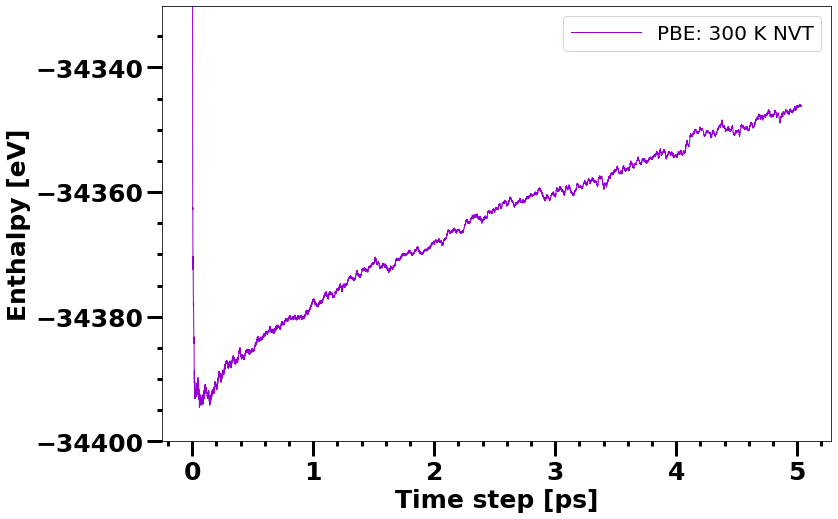

In [9]:


plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


plt.plot(np.array(time_ps)[0:52000], enthal_eV[0:52000],  color="darkviolet", label='PBE: 300 K NVT', linewidth=1)
#plt.plot(np.array(time_ps)[52000:], enthal_eV[52000:],  color="red", label='PBE: NVE', linewidth=1)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=15, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(np.arange(0, 5.4, 1))
plt.yticks(np.arange(-34400, -34330.2, 20))
plt.ylim([-34400, -34330.2])
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=1, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Time step [ps]', fontsize=25, fontweight='bold')
plt.ylabel('Enthalpy [eV]', fontsize=25, fontweight='bold')

plt.savefig('iodate_enthalpy_pbe_300k_nvt.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()
        

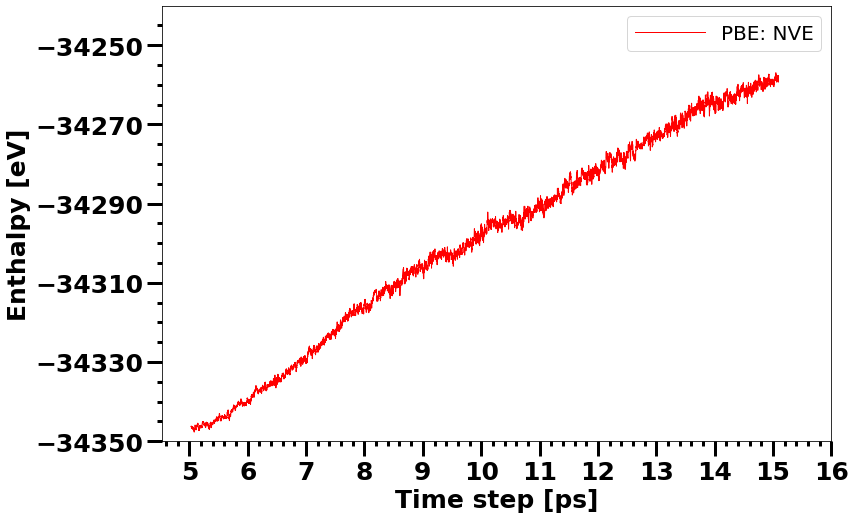

In [10]:
plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


#plt.plot(np.array(time_ps)[0:52000], enthal_eV[0:52000],  color="darkviolet", label='PBE: 300 K NVT', linewidth=1)
plt.plot(np.array(time_ps)[52000:], enthal_eV[52000:],  color="red", label='PBE: NVE', linewidth=1)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=15, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(np.arange(5, 16.4, 1))
plt.yticks(np.arange(-34350, -34240.2, 20))
plt.ylim([-34350, -34240.2])
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=1, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Time step [ps]', fontsize=25, fontweight='bold')
plt.ylabel('Enthalpy [eV]', fontsize=25, fontweight='bold')

plt.savefig('iodate_enthalpy_pbe_nve.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()
        

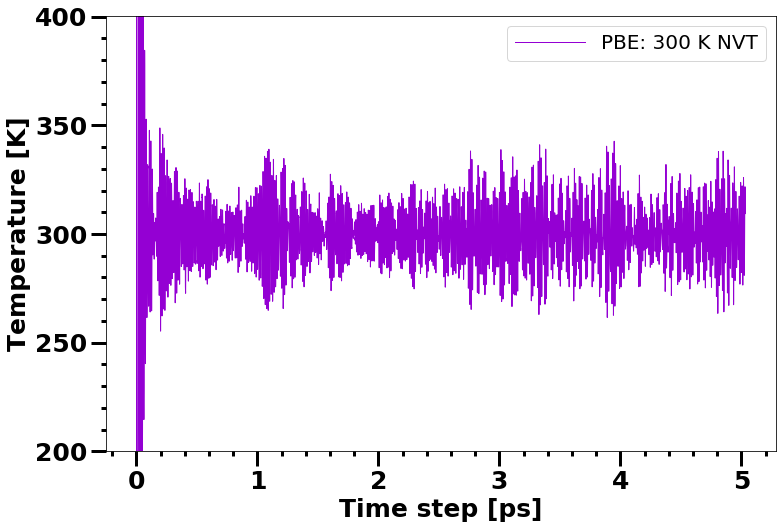

In [11]:



plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


plt.plot(time_ps[0:52000], Tion_K[0:52000],  color="darkviolet", label='PBE: 300 K NVT', linewidth=1)
#plt.plot(time_ps[52000:], Tion_K[52000:],  color="red", label='PBE: NVE', linewidth=1)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=15, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(np.arange(0, 5.4, 1))
plt.yticks(np.arange(200, 400.10, 50))
plt.ylim([200, 400.10])
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=1, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Time step [ps]', fontsize=25, fontweight='bold')
plt.ylabel('Temperature [K]', fontsize=25, fontweight='bold')

plt.savefig('iodate_temperature_pbe_300k_nvt.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()

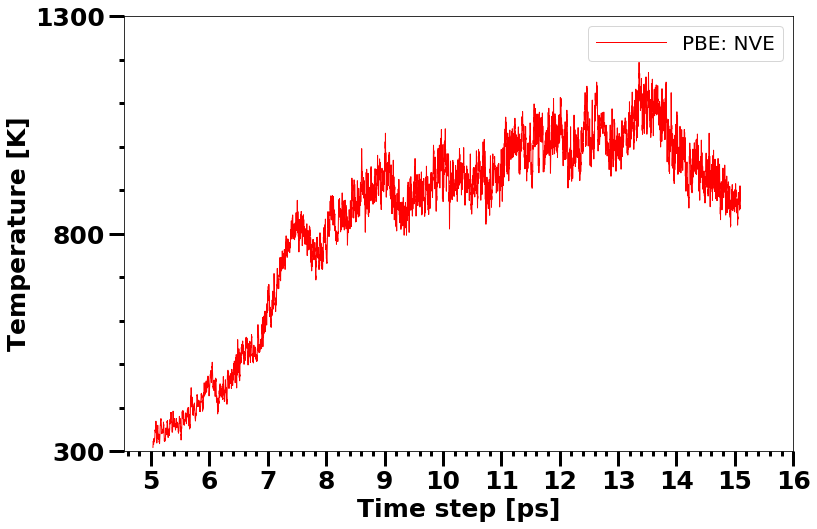

In [12]:
plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


#plt.plot(time_ps[0:52000], Tion_K[0:52000],  color="darkviolet", label='PBE: 300 K NVT', linewidth=1)
plt.plot(time_ps[52000:], Tion_K[52000:],  color="red", label='PBE: NVE', linewidth=1)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=15, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(np.arange(5, 16.4, 1))
plt.yticks(np.arange(300, 1300.10, 500))
plt.ylim([300, 1300.10])
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.legend(loc=1, prop={'size': 20}, handlelength=3.5)
plt.xlabel('Time step [ps]', fontsize=25, fontweight='bold')
plt.ylabel('Temperature [K]', fontsize=25, fontweight='bold')

plt.savefig('iodate_temperature_pbe_nve.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()